In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
kashti = sns.load_dataset('titanic')
kashti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='sex', ylabel='age'>

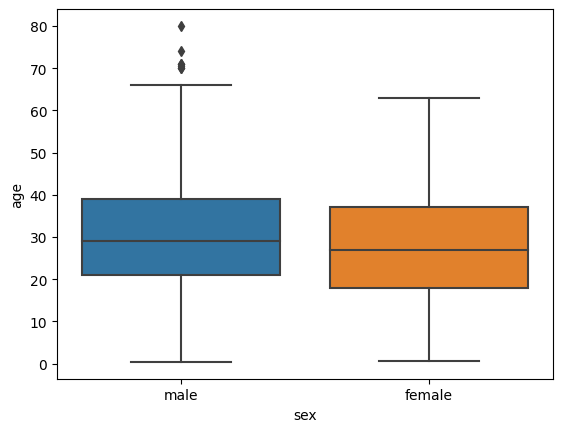

In [6]:
sns.boxplot(x='sex', y='age', data=kashti)

<Axes: xlabel='class', ylabel='age'>

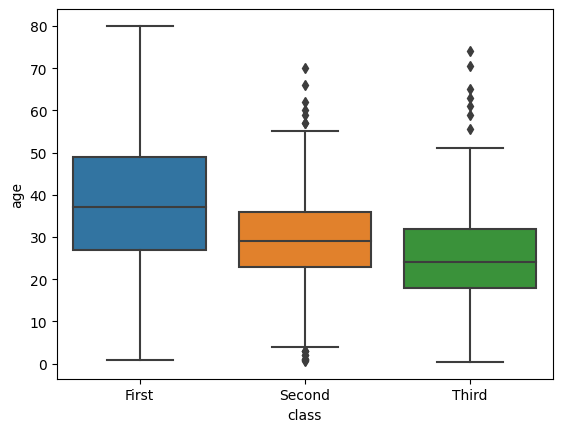

In [7]:
sns.boxplot(x='class', y='age', data=kashti) #ANOVA 

In [8]:
phool = sns.load_dataset('iris')
phool.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
phool.sample(15)

,sepal_length,sepal_width,petal_length,petal_width,species
120,6.9,3.2,5.7,2.3,virginica
70,5.9,3.2,4.8,1.8,versicolor
89,5.5,2.5,4.0,1.3,versicolor
106,4.9,2.5,4.5,1.7,virginica
67,5.8,2.7,4.1,1.0,versicolor
56,6.3,3.3,4.7,1.6,versicolor
19,5.1,3.8,1.5,0.3,setosa
12,4.8,3.0,1.4,0.1,setosa
82,5.8,2.7,3.9,1.2,versicolor
8,4.4,2.9,1.4,0.2,setosa


In [10]:
phool.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: xlabel='species', ylabel='sepal_length'>

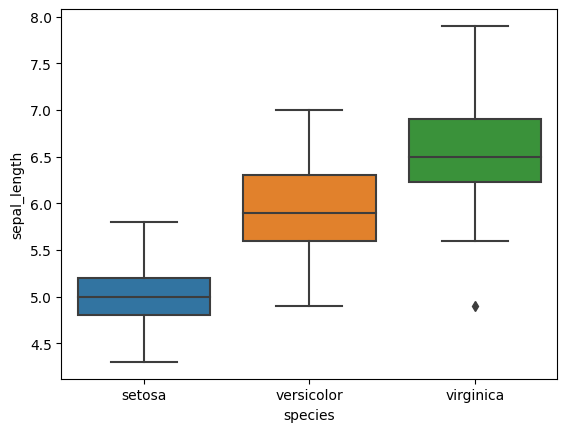

In [12]:
sns.boxplot(x = 'species', y = 'sepal_length', data = phool)

In [14]:
# Stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [15]:
# one way ANOVA 
mod = ols('sepal_length ~ species', data=phool).fit()
aov_table = sm.stats.anova_lm(mod, type=2)
print(aov_table)

             df     sum_sq    mean_sq           F        PR(>F)
species     2.0  63.212133  31.606067  119.264502  1.669669e-31
Residual  147.0  38.956200   0.265008         NaN           NaN


In [16]:
# pairwise comparison
pair_t = mod.t_test_pairwise('species', method='bonferroni')
pair_t.result_frame 

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-bonferroni,reject-bonferroni
versicolor-setosa,0.930,0.102958,9.032819,8.770194e-16,0.726531,1.133469,2.631058e-15,True
virginica-setosa,1.582,0.102958,15.365506,2.214821e-32,1.378531,1.785469,6.644464e-32,True
virginica-versicolor,0.652,0.102958,6.332686,2.765638e-09,0.448531,0.855469,8.296915e-09,True


In [27]:
pip install pingouin


     ------------------------------------- 198.6/198.6 kB 38.3 kB/s eta 0:00:00
     ---------------------------------------- 9.2/9.2 MB 22.3 kB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 19.3 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     --------------------------------------- 62.6/62.6 kB 21.8 kB/s eta 0:00:00
     ------------------------------------- 302.2/302.2 kB 28.5 kB/s eta 0:00:00
     --------------------------------------- 62.5/62.5 kB 19.9 kB/s eta 0:00:00
     --------------------------------------- 62.5/62.5 kB 44.6 kB/s eta 0:00:00
     --------------------------------------- 62.8/62.8 kB 21.0 kB/s eta 0:00:00
     --------------------------------------- 62.8/62.8 kB 26.3 kB/s eta 0:00:00
     --------------------------------------- 62.8/62.8 kB 32.7 kB/s eta 0:00:00
     --------------------------------------- 63.1/63.1 kB 43.9 kB/s eta 0:00:00
     --------------

  DEPRECATION: littleutils is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
# tukey hsd test

import pingouin as pg 
aov = pg.anova(data=phool, dv= 'sepal_length', between='species', detailed=True)
print(aov)

    Source         SS   DF         MS           F         p-unc       np2
0  species  63.212133    2  31.606067  119.264502  1.669669e-31  0.618706
1   Within  38.956200  147   0.265008         NaN           NaN       NaN


In [32]:
# tukey HSD
pt = pg.pairwise_tukey(data=phool, dv= 'sepal_length', between='species')
print(pt)

            A           B  mean(A)  mean(B)   diff        se          T   
0      setosa  versicolor    5.006    5.936 -0.930  0.102958  -9.032819  \
1      setosa   virginica    5.006    6.588 -1.582  0.102958 -15.365506   
2  versicolor   virginica    5.936    6.588 -0.652  0.102958  -6.332686   

        p-tukey    hedges  
0  2.420286e-14 -2.088053  
1  2.153833e-14 -3.053629  
2  8.287554e-09 -1.117195  
